# YourCabs Analysis

### Description
- ### Business problem tackled here is trying to improve customer service for YourCabs.com, a cab company in Bangalore.
- ### The problem of interest is booking cancellations by the company due to unavailability of a car. The challenge is that cancellations can occur very close to the trip start time, thereby causing passengers inconvenience.

### Goal
- ### The goal of the competition is to create a predictive model for classifying new bookings as to whether they will eventually gets cancelled due to car unavailability.

### Importing libraries and modules

In [49]:
import pandas as pd
import numpy as np
import os
from datetime import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt

### Fetching data from data source

In [50]:
cwd = os.path.dirname(os.getcwd())
data_path = os.path.join(cwd,'data','YourCabs.csv')
raw_data = pd.read_csv(data_path)
raw_data


,id,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,to_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation
0,132512,22177,28,NaN,2,83.0,448.0,NaN,NaN,1/1/2013 2:00,NaN,0,0,1/1/2013 1:39,12.924150,77.672290,12.927320,77.635750,0
1,132513,21413,12,NaN,2,1010.0,540.0,NaN,NaN,1/1/2013 9:00,NaN,0,0,1/1/2013 2:25,12.966910,77.749350,12.927680,77.626640,0
2,132514,22178,12,NaN,2,1301.0,1034.0,NaN,NaN,1/1/2013 3:30,NaN,0,0,1/1/2013 3:08,12.937222,77.626915,13.047926,77.597766,0
3,132515,13034,12,NaN,2,768.0,398.0,NaN,NaN,1/1/2013 5:45,NaN,0,0,1/1/2013 4:39,12.989990,77.553320,12.971430,77.639140,0
4,132517,22180,12,NaN,2,1365.0,849.0,NaN,NaN,1/1/2013 9:00,NaN,0,0,1/1/2013 7:53,12.845653,77.677925,12.954340,77.600720,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43426,185937,14364,12,NaN,2,1147.0,452.0,15.0,NaN,11/24/2013 18:00,41602.82020,1,0,11/24/2013 14:25,13.030640,77.649100,12.952780,77.590880,0
43427,185938,48727,12,NaN,2,393.0,466.0,15.0,NaN,11/26/2013 1:00,41604.08037,1,0,11/24/2013 14:30,13.199560,77.706880,13.017436,77.644580,0
43428,185939,48729,12,1.0,3,974.0,NaN,15.0,NaN,11/24/2013 18:30,41602.97917,0,0,11/24/2013 14:35,13.075570,77.559040,NaN,NaN,0
43429,185940,30724,87,NaN,2,1263.0,542.0,15.0,NaN,11/24/2013 16:00,41602.69495,0,0,11/24/2013 14:43,12.968970,77.594560,12.938230,77.622890,0


### Field descriptions:

- id - booking ID
- user_id - the ID of the customer (based on mobile number)
- vehicle_model_id - vehicle model type.
- package_id - type of package 
    - (1=4hrs & 40kms, 2=8hrs & 80kms, 3=6hrs & 60kms, 4= 10hrs & 100kms, 5=5hrs & 50kms, 6=3hrs & 30kms, 7=12hrs & 120kms)
- travel_type_id - type of travel (1=long distance, 2= point to point, 3= hourly rental).
- from_area_id - unique identifier of area. Applicable only for point-to-point travel and packages
- to_area_id - unique identifier of area. Applicable only for point-to-point travel
- from_city_id - unique identifier of city
- to_city_id - unique identifier of city (only for intercity)
- from_date - time stamp of requested trip start
- to_date - time stamp of trip end
- online_booking - if booking was done on desktop website
- mobile_site_booking - if booking was done on mobile website
- booking_created - time stamp of booking
- from_lat - latitude of from area
- from_long - longitude of from area
- to_lat - latitude of to area
- to_long - longitude of to area
- Car_Cancellation - whether the booking was cancelled (1) or not (0) due to unavailability of a car.

# Data cleaning and preprocessing

### Checking Column names

In [51]:
raw_data.columns

Index(['id', 'user_id', 'vehicle_model_id', 'package_id', 'travel_type_id',
       'from_area_id', 'to_area_id', 'from_city_id', 'to_city_id', 'from_date',
       'to_date', 'online_booking', 'mobile_site_booking', 'booking_created',
       'from_lat', 'from_long', 'to_lat', 'to_long', 'Car_Cancellation'],
      dtype='object')

- All the columns are correct and meaningful , there are no unecessary whitespace.

### Checking dtypes

In [52]:
raw_data.dtypes

id                       int64
user_id                  int64
vehicle_model_id         int64
package_id             float64
travel_type_id           int64
from_area_id           float64
to_area_id             float64
from_city_id           float64
to_city_id             float64
from_date               object
to_date                float64
online_booking           int64
mobile_site_booking      int64
booking_created         object
from_lat               float64
from_long              float64
to_lat                 float64
to_long                float64
Car_Cancellation         int64
dtype: object

- 'id','user_id','vehicle_model_id','package_id','travel_type_id','from_area_id','to_area_id','from_city_id','to_city_id','online_booking','mobile_site_booking',  
- 'from_lat''from_long','to_lat','to_long','Car_Cancellation' 
- These columns should be Object data type as it is categorical data.
- 'from_date','to_date','booking_created' should be datetime data type.
- 'to_date' has the julian time type

In [53]:
# Changing the column dtypes to object
raw_data[['id','user_id','vehicle_model_id','package_id','travel_type_id','from_area_id','to_area_id',
                                       'from_city_id','to_city_id','online_booking',
                                       'mobile_site_booking','from_lat','from_long','to_lat','to_long',
                                       'Car_Cancellation']] = raw_data[['id','user_id','vehicle_model_id','package_id','travel_type_id','from_area_id','to_area_id',
                                                                        'from_city_id','to_city_id','online_booking','mobile_site_booking',
                                                                        'from_lat','from_long','to_lat','to_long',
                                                                        'Car_Cancellation']].astype('object')

# Changing the date to date column to appropiate data type
raw_data[['from_date','booking_created']] = raw_data[['from_date','booking_created']].astype('datetime64[s]')


# converting julian type to datetime64[s]
def julian_to_date_time(x):
    tp =pd.to_datetime(x,unit='D',origin=pd.Timestamp("30-12-1899"))
    return tp

raw_data['to_date'] = raw_data['to_date'].apply(julian_to_date_time)
raw_data['to_date'] = raw_data['to_date'].astype('datetime64[s]')

In [54]:
raw_data.dtypes

id                            object
user_id                       object
vehicle_model_id              object
package_id                    object
travel_type_id                object
from_area_id                  object
to_area_id                    object
from_city_id                  object
to_city_id                    object
from_date              datetime64[s]
to_date                datetime64[s]
online_booking                object
mobile_site_booking           object
booking_created        datetime64[s]
from_lat                      object
from_long                     object
to_lat                        object
to_long                       object
Car_Cancellation              object
dtype: object

### Counting number of missing values for each field

In [55]:
raw_data.isna().sum()

id                         0
user_id                    0
vehicle_model_id           0
package_id             35881
travel_type_id             0
from_area_id              88
to_area_id              9138
from_city_id           27086
to_city_id             41843
from_date                  0
to_date                17890
online_booking             0
mobile_site_booking        0
booking_created            0
from_lat                  93
from_long                 93
to_lat                  9138
to_long                 9138
Car_Cancellation           0
dtype: int64

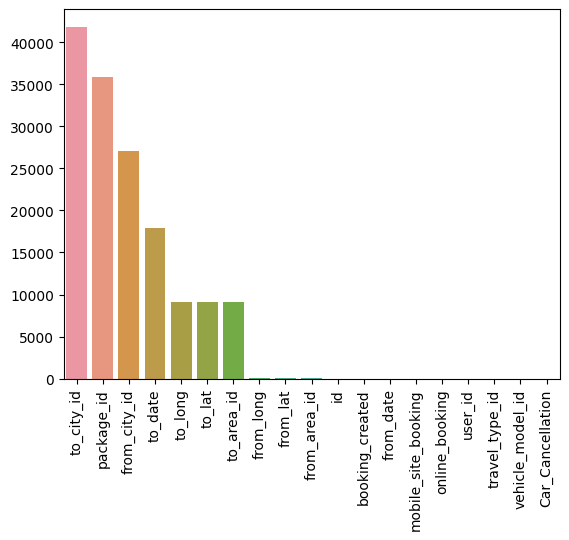

In [56]:
sns.barplot(x=raw_data.isna().sum().sort_values(ascending=False).index,y=raw_data.isna().sum().sort_values(ascending=False))
plt.xticks(rotation=90)
plt.show()

### Checking Value count of Target variable

In [57]:
raw_data.Car_Cancellation.value_counts(dropna=False)

Car_Cancellation
0    40299
1     3132
Name: count, dtype: int64

Text(0.5, 0, 'Car_cancellation')

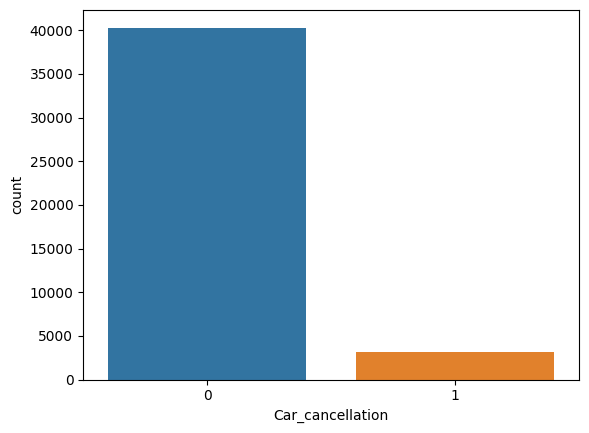

In [58]:
sns.barplot(x=raw_data.Car_Cancellation.value_counts(dropna=False).index,y=raw_data.Car_Cancellation.value_counts(dropna=False))
plt.xlabel('Car_cancellation')

- This is a situation of imbalance data 

### Checking number of unique values of each feature

In [59]:
raw_data.nunique(dropna=False)

id                     43431
user_id                22267
vehicle_model_id          27
package_id                 8
travel_type_id             3
from_area_id             599
to_area_id               569
from_city_id               4
to_city_id               117
from_date              20377
to_date                22145
online_booking             2
mobile_site_booking        2
booking_created        39349
from_lat                 467
from_long                463
to_lat                   451
to_long                  448
Car_Cancellation           2
dtype: int64

- There are 22267 users using the yourcab service
- There are 27 different vechicals in the yourcab service

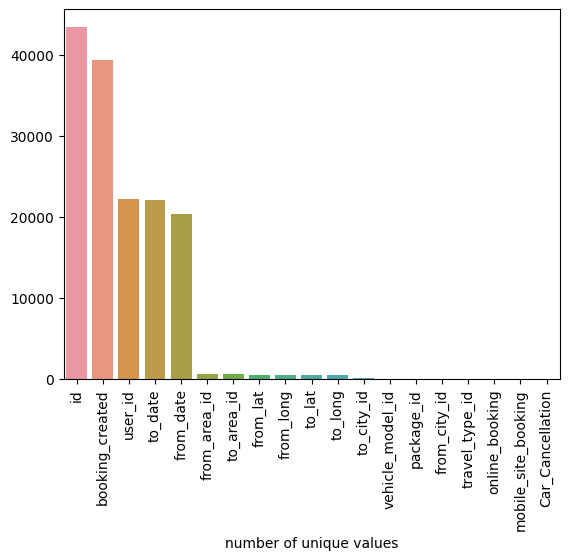

In [60]:
raw_data.nunique(dropna=False)
sns.barplot(x=raw_data.nunique(dropna=False).sort_values(ascending=False).index,y=raw_data.nunique(dropna=False).sort_values(ascending=False))
plt.xticks(rotation=90)
plt.xlabel('number of unique values')
plt.show()

### Checking for Duplicates

In [61]:
raw_data[raw_data.duplicated()==True].count()

id                     0
user_id                0
vehicle_model_id       0
package_id             0
travel_type_id         0
from_area_id           0
to_area_id             0
from_city_id           0
to_city_id             0
from_date              0
to_date                0
online_booking         0
mobile_site_booking    0
booking_created        0
from_lat               0
from_long              0
to_lat                 0
to_long                0
Car_Cancellation       0
dtype: int64

# Feature Engineering

### Adding season feature extracted from the from_date

In [62]:
def season(from_date):
    month = from_date.month

    if month in [2,3]:
        return 1
    
    elif month in [4,5,6]:
        return 2
    elif month in [7,8,9]:
        return 3
    else:
        return 4
    
raw_data['season'] = raw_data.from_date.apply(season)
raw_data['season'] = raw_data['season'].astype('object')

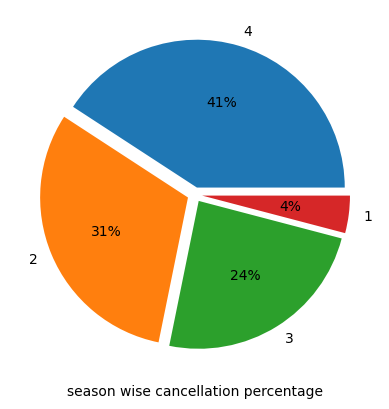

In [63]:
season_cancel =raw_data[(raw_data['Car_Cancellation']==1)].season.value_counts()
total = raw_data[(raw_data['Car_Cancellation']==1)].season.value_counts().sum()

plt.pie(x=list(season_cancel.values/total*100),labels=season_cancel.index,explode=[.05,.05,.05,.05],autopct='%.0f%%')
plt.xlabel('season wise cancellation percentage')
plt.show()

- {spring: 1 , summer:2 , autumn : 3 , winter : 4 }

- Spring has least amount of cancellation
- Winter has highest number of cancellation

### Adding day of week 

In [64]:
def day_of_week(from_date):
    day = from_date.day_of_week
    return day

raw_data['day_of_departure'] = raw_data['from_date'].apply(day_of_week)
raw_data['day_of_departure'] = raw_data['day_of_departure'].astype('object')

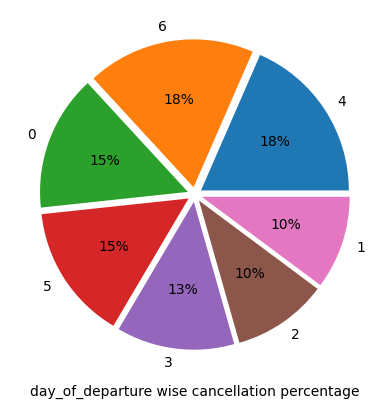

In [121]:
day_cancel =raw_data[(raw_data['Car_Cancellation']==1)].day_of_departure.value_counts()
total = raw_data[(raw_data['Car_Cancellation']==1)].day_of_departure.value_counts().sum()

plt.pie(x=list(day_cancel.values/total*100),labels=day_cancel.index,explode=[.05,.05,.05,.05,.05,.05,.05],autopct='%.0f%%')
plt.xlabel('day_of_departure wise cancellation percentage')
plt.show()

- {monday:0,tuesday:1,wednesday:2,thursday:3,friday:4,saturday:5,sunday:6}

- Sunday and friday are high cancellation days
- Monday and tuesday are least cancellation days
- But most of days have aprroximately equal number of cancellation

### Adding time of day

In [66]:
def hour_of_dep(from_date):
    hour = from_date.hour
    
    if hour >=0 and hour<=5:
        return 0
    elif hour >=6 and hour<=12:
        return 1
    elif hour >=13 and hour <=18:
        return 2
    else:
        return 3

raw_data['hour_of_departure'] = raw_data['from_date'].apply(hour_of_dep)
raw_data['hour_of_departure'] = raw_data['hour_of_departure'].astype('object')

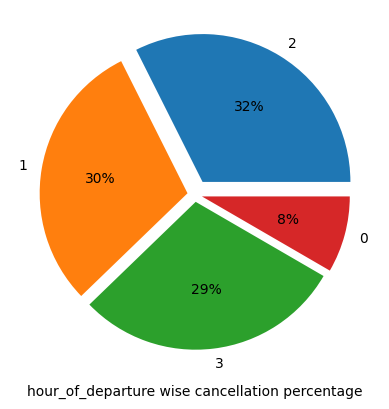

In [67]:
hour_cancel =raw_data[(raw_data['Car_Cancellation']==1)].hour_of_departure.value_counts()
total = raw_data[(raw_data['Car_Cancellation']==1)].hour_of_departure.value_counts().sum()

plt.pie(x=list(hour_cancel.values/total*100),labels=hour_cancel.index,explode=[.1,.05,.05,.05],autopct='%.0f%%')
plt.xlabel('hour_of_departure wise cancellation percentage')
plt.show()

- {mid-night : 0 , morning : 1 , afternoon : 2, evening_night = 3 }

- Most of the cancellation have taken place in afternoon 1pm to 6pm
- Also most cancellations have happend in morning 6am to 12pm

### Time difference between booking created and from date of departure

In [68]:
diff = []
for i in range(raw_data.shape[0]):
   diff.append((raw_data['from_date'][i] - raw_data['booking_created'][i]).total_seconds()/(60*60))

diff = np.array(diff)
raw_data['gap_hours'] = pd.Series(diff)

count    3132.000000
mean       41.313075
std       128.174988
min        -9.433333
25%         2.016667
50%         4.675000
75%        10.900000
max      1196.150000
Name: gap_hours, dtype: float64

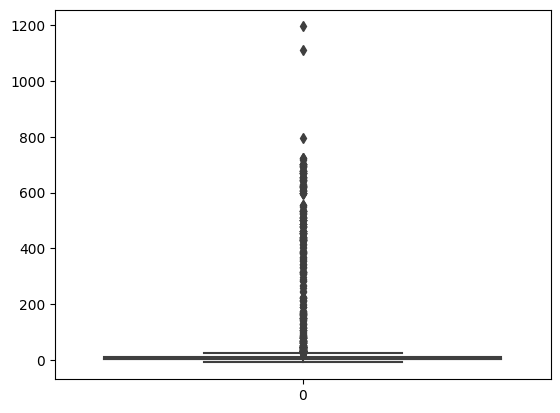

In [117]:
sns.boxplot(raw_data[(raw_data['Car_Cancellation']==1)]['gap_hours'].values)
raw_data[(raw_data['Car_Cancellation']==1)]['gap_hours'].describe()

### bifercating areas based on cancellation

count    405.000000
mean       7.728395
std       12.668676
min        1.000000
25%        2.000000
50%        4.000000
75%        9.000000
max      127.000000
Name: count, dtype: float64

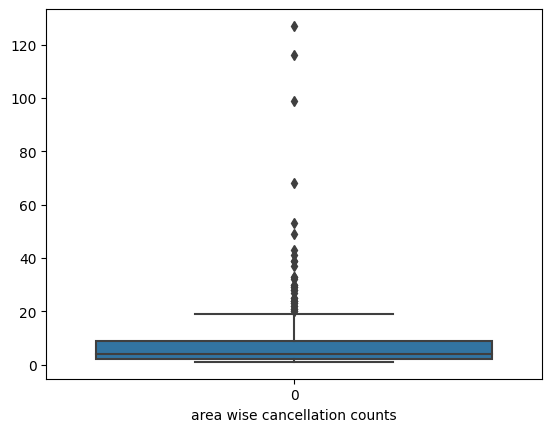

In [132]:
total = raw_data[(raw_data['Car_Cancellation']==1)]['from_area_id'].count()
area_counts = raw_data[(raw_data['Car_Cancellation']==1)]['from_area_id'].value_counts()
sns.boxplot(area_counts.values)
plt.xlabel('area wise cancellation counts')
area_counts.describe()

In [140]:
vl_areas =area_counts[(area_counts.values<4)].index
low_Area = area_counts[(area_counts >=4 )& (area_counts <9)].index
medium_Area = area_counts[(area_counts >=9 )& (area_counts <=20)].index
high_Area = area_counts[area_counts>20].index

In [152]:
x=high_Area.sort_values(ascending=False)[0:5]

Text(0.5, 0, 'area wise top 5 cancellation counts')

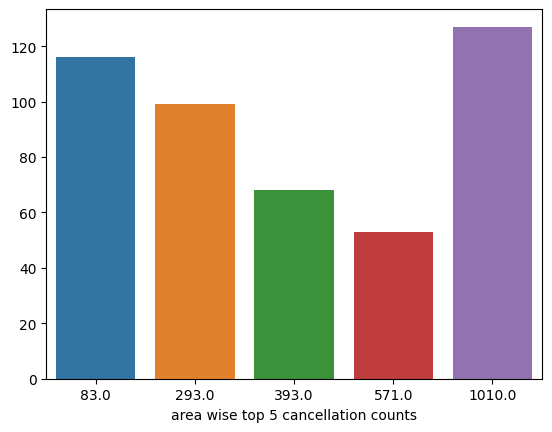

In [138]:
sns.barplot(x=x[0:5].index,y=x.values)
plt.xlabel('area wise top 5 cancellation counts')

-These are the top 5 high cancellation area

In [137]:
def area_bifer(area):
    if area in vl_areas:
        return 0
    elif area in low_Area:
        return 1
    elif area in medium_Area:
        return 2
    elif area in high_Area:
        return 3
    else:
        return -1

raw_data['area_cancel_per'] =raw_data['from_area_id'].apply(area_bifer)

-  high:>20
- medium: >9 and<20
- low :>4 and <9
- very low :<4 

### Top users 

In [97]:
booking_per_user = raw_data.groupby(by='user_id')['id'].count()

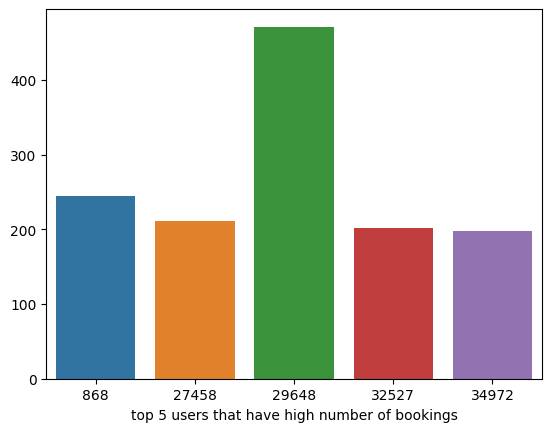

In [102]:
sns.barplot(x=booking_per_user.sort_values(ascending=False)[0:5].index,y=booking_per_user.sort_values(ascending=False)[0:5].values)
plt.xlabel('top 5 users that have high number of bookings')
plt.show()

### Travel_id wise cancellation

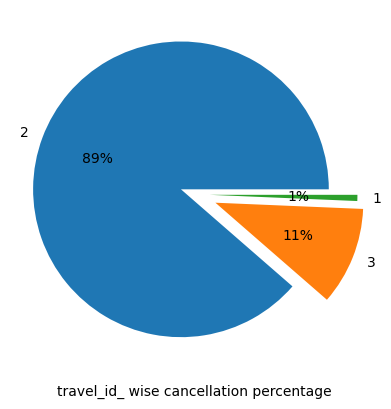

In [110]:
travel_id_cancel =raw_data[(raw_data['Car_Cancellation']==1)].travel_type_id.value_counts()
total = raw_data[(raw_data['Car_Cancellation']==1)].travel_type_id.value_counts().sum()

plt.pie(x=list(travel_id_cancel.values/total*100),labels=travel_id_cancel.index,explode=[.1,.15,0.1],autopct='%.0f%%')
plt.xlabel('travel_id_ wise cancellation percentage')
plt.show()

## Separation of dataset by the travel_id field

In [72]:
long_dis = raw_data[raw_data['travel_type_id'] == 1]
ptp = raw_data[raw_data['travel_type_id'] == 2]
rental = raw_data[raw_data['travel_type_id'] == 3]

- saving datasets

In [73]:
long_dis.to_csv(os.path.join(cwd,'data','travel_id_1.csv'),index=False)
ptp.to_csv(os.path.join(cwd,'data','travel_id_2.csv'),index=False)
rental.to_csv(os.path.join(cwd,'data','travel_id_3.csv'),index=False)

In [74]:
raw_data.to_csv(os.path.join(cwd,'data','raw.csv'),index=False)